Let's dig into waterfall plots in plotly, and see how much we can customize this

In [1]:
import pandas as pd
import plotly.graph_objects as go

import plotly.io as pio
pio.renderers.default = "svg"

Start with the base example from the documentation:

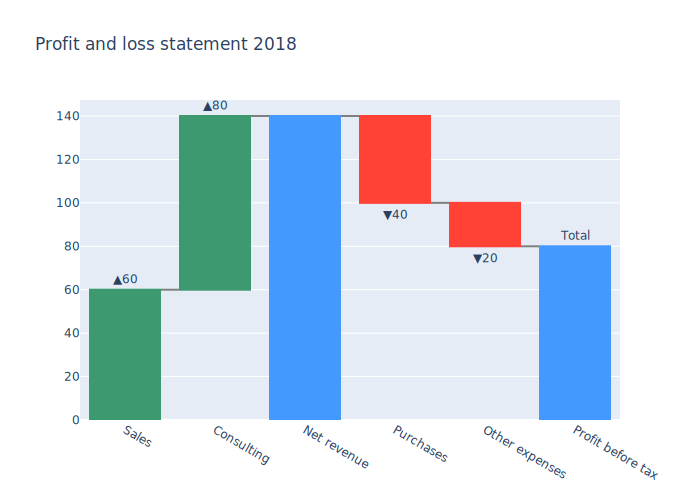

In [2]:
fig = go.Figure(go.Waterfall(
    measure = ["relative", "relative", "total", "relative", "relative", "total"],
    x = ["Sales", "Consulting", "Net revenue", "Purchases", "Other expenses", "Profit before tax"],
    y = [60, 80, 0, -40, -20, 0],
    textposition = "outside",
    text = ["▲60", "▲80", "", "▼40", "▼20", "Total"],
    connector = {"line":{"color":"grey"}},
))

fig.update_layout(title = "Profit and loss statement 2018")

fig.show()

Let's break this down a little, starting with an even more simple example into the three most important building blocks:

* `measure`: Options: `'relative'`, `'total'`, or `'absolute'`
    * `'total'` compute the sums
    * `'absolute'` resets the computed total or use as an initial value
* `x`: Since this is a horizontal bar waterfall chart, x is a list of 'strings' that represent the categories
* `y`: Where the `measure` is relative, this needs to be a change. 
* `text`: The label for each bar in the waterfall chart.

Notice the bars are automatically colored based on `y` values and the `measure` values. The `measure` default is `relative`, and having an `absolute` item would be just for instances in which you want to reset the aggregation or if you want to start with a number. 

### Here's an example of using `absolute` to walk from "Net revenue" to "Profit before tax":

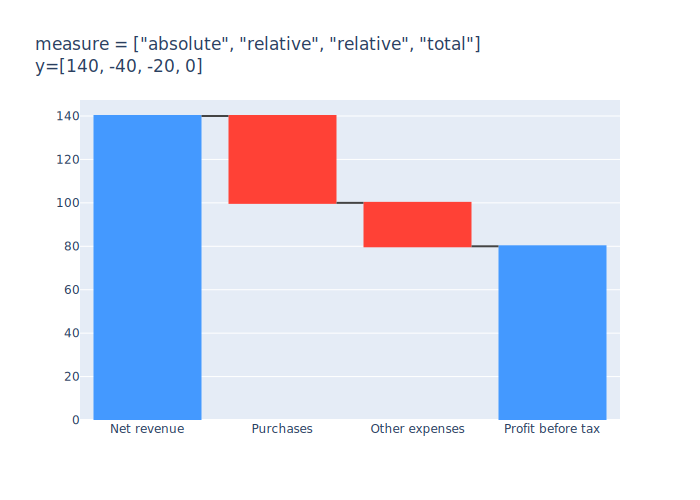

In [3]:
fig = go.Figure(go.Waterfall(
    measure = ["absolute", "relative", "relative", "total"],
    x = ["Net revenue", "Purchases", "Other expenses", "Profit before tax"],
    y = [140, -40, -20, 0],
))

fig.update_layout(title='measure = ["absolute", "relative", "relative", "total"] <br> y=[140, -40, -20, 0]')
fig.show()

Notice that we now need to set a value for `y` for `Net revenue` because we set the `measure` to "absolute". If we left it at 0 or set it to "total" it would just be 0.

# A Finance Example

Let's do a simple example of a year over year operating margin walk. Let's imagine we had data that was just *perfectly* shaped, like:

In [4]:
df = pd.DataFrame(data={"measure": ["absolute", "relative", "relative", "relative", "total"],
                  "x":["2020 OM", "Revenue", "Cost of Sales", "Spending", "2021 OM"],
                  "y" : [80, 10, -5, -20, 100],
                   "text" : ["$80M", "▲$10M", "▼$5M", "▼$20M", "$65M"]})
df

,measure,x,y,text
0,absolute,2020 OM,80,$80M
1,relative,Revenue,10,▲$10M
2,relative,Cost of Sales,-5,▼$5M
3,relative,Spending,-20,▼$20M
4,total,2021 OM,100,$65M


Then we could construct our waterfall as follows:

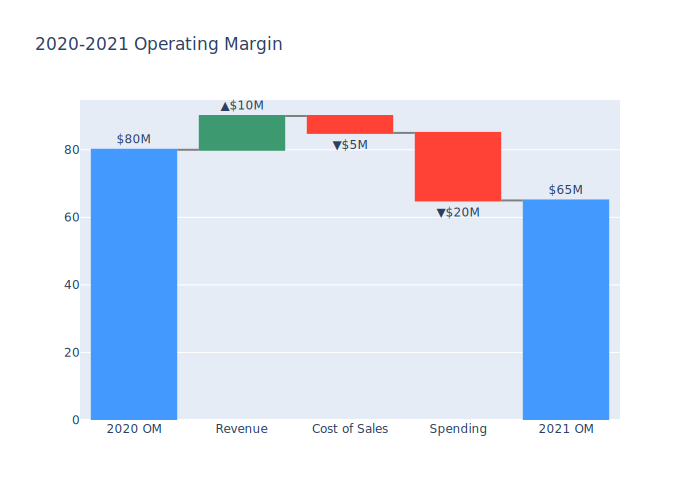

In [5]:
fig = go.Figure(go.Waterfall(
    measure = df["measure"],
    x = df["x"],
    y = df["y"],
    textposition = "outside",
    text = df["text"],
    connector = {"line":{"color":"grey"}},
))

fig.update_layout(title = "2020-2021 Operating Margin")

fig.show()

The above waterfall shows how changes in revenue, costs, and spending drove a decrease in operating margin from 2020 to 2021. Reading from left to right:

* 2020 Operating Margin (OM) was \\$80M
* Revenue increased by \\$10M
* Cost of Sales increased by \\$5M compared to last year
* Spending increased by \\$20M from the previous year
* The result of these changes is a \\$65M Operating Margin for 2021.

## Getting the data in just the right format is left as an exercise for the reader

We can already see two things that are going to be annoying: 

1. Formatting a dataframe to get all of these values in *just* the right shape for this
2. Automatically generating the `text` labels based on the values rather than explicitly typing them in. 

Plotly helps with the rendering of the SVG, everything else is up to you! Still the best option for making a waterfall chart in Python that I've seen.

# Customization

Plotly comes with a bunch of templates built in that are a great starting point. We'll go with the simple version:

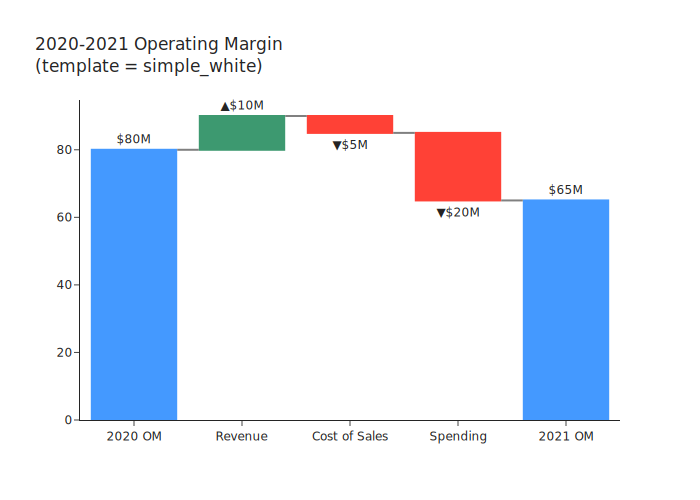

In [6]:
fig = go.Figure(go.Waterfall(
    measure = df["measure"],
    x = df["x"],
    y = df["y"],
    textposition = "outside",
    text = df["text"],
    connector = {"line":{"color":"grey"}},
))

fig.update_layout(title = "2020-2021 Operating Margin <br> (template = simple_white)",
                 template='simple_white')

fig.show()